# Easy natural language processing

## Outline

* Quick rundown of NLP taks
* Build your own spam detector
* Build your own sentiment analyzer
* NLTK library exploration
* Latent semantic analysis (LSA)
* Build your own article spinner

---------------------------------------------------------------------

## NLP applications

### Very good @

* **Spam detection**
    - Filtering spam emails in inbox and/or categorizing them like "Primary", "Social" etc.


* **POS (parts-of-speech) tagging**
    - Given a sentence, we identify noun, adjective, verb etc.


* **NER (named-entity recognition)**
    - Given a sentence, we identify whether the word represents a person, an organization etc.

===============================================================

### Pretty good @

* **Sentiment analysis**
    - Assigning a score to a sentence based on word analysis.
    
    
* **Machine Translation**
    - Translating text into different languages
    
    
* **Information Extraction**
    - E.g. Adding events to the calender by automatically reading content of message.

===============================================================

### Needs Improvement

* **Machine conversations**
    - Speech recognition (Cortana, Siri), extracting meaning from spoken words and replying with meaningful response.


* **Paraphrasing and summarization**
    - Summarize an article into few sentences (AI base AMP)

---------------------------------------------------------------------

## Why is NLP hard?

### Ambiguity 1

Republicans Grill IRS Chief Over Lost Emails

Interpretations:

1. Republicans harshly question the chief about the emails
2. Republicans cook the chief using email as the fuel

### Ambiguity 2

I saw a man on a hill with a telescope.

Interpretations:

1. There's a man on a hill, and I'm watching him with my telescope.
2. There's a man on a hill, who I'm seeing, and he has a telescope.
3. There's a man, and he's on a hill that also has a telescope on it.
4. I'm on a hill, and I saw a man using a telescope

### Ambiguity 3

Twitter feeds: 'u', 'ur', 'lol', 'netflix and chill'

# Building a spam detector

Dataset: [https://archive.ics.uci.edu/ml/datasets/Spambase]

### Data description

**Columns 1 - 48: word frequency measure** - number of times a word appears divided by number of words in document * 100

**Last column is label**: 1 = spam, 0 = not spam

In [42]:
# http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [43]:
data = pd.read_csv('spambase/spambase.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [44]:
data = data.as_matrix()
type(data)

numpy.ndarray

In [46]:
X = data[:,:48]
Y = data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, shuffle=True)

In [47]:
X_train.shape

(3220, 48)

In [48]:
X_test.shape

(1381, 48)

In [49]:
Y_train.shape

(3220,)

In [50]:
Y_test.shape

(1381,)

In [51]:
model = MultinomialNB()
model.fit(X_train, Y_train)
print('Classification rate for MultinomialNB: {}'.format(model.score(X_test, Y_test)))

Classification rate for MultinomialNB: 0.8725561187545257


In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
print('Classification rate for AdaBoost: {}'.format(model.score(X_test, Y_test)))

Classification rate for AdaBoost: 0.9261404779145547


## More on feature extraction (getting the features)

Collectively called as **"bag of words"** we have following techiniques available for extracing features from words:

1. word proportion (the one used in above example)
2. raw word counts
3. binary (1 if word appears, 0 otherwise)
4. TF-IDF (takes into account the face that some words appear in many documents and hence don't really tell us much e.g. 'and', 'in', 'or' etc.))

Useful link for TF-IDF [http://scikit-learn.org/stable/modules/feature_extraction.html]

# Build a sentiment analyzer
### (Note: The sentiment analyzer is implemented using the word proportion method)

* sentiment = how positive or negative some text is
* applications = amazon reviews, yelp reviews, hotel reviews, tweets

Dataset: [https://www.cs.jhu.edu/~mdredze/datasets/sentiment/index2.html]

### Outline of our sentiment analyzer

* We'll just look at the **electronics category**, but you can try the same code on others
* We could use 5 start targets to do regression, but let's just do classification since they are already marked 'positive' and 'negative'
* **XML parser (BeautifulSoup)**
* Only look at key **'review_text'**
* We'll need 2 passes, one to determine vocabulary size and which index corresponds to which word, and one to create data vectors
* After that, we can just use any **SKLearn classifier** as we did previously
* But we'll **use logistic regression so we can interpret the weights**

====================================================================
* Essential imports

In [65]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split
import pandas as pd

* Initilizing WordNetLemmatizer
* Initializing stopwords

In [66]:
# Converts words to their base form
# More on lemmatizer
# http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization 

word_net_lemmatizer = WordNetLemmatizer()

# reading 'given' stopwords, words that give neutral sentiment
# rstrip - removes the characters to the right based on given parameter
#stopwords = set(word.rstrip() for word in open('stopwords.txt'))

# we will use nltk provided stopwords
stopwords = set(nltk_stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

* Loading reviews dataset

In [67]:
# More on BeautifulSoup
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
# reading XML files using BeautifulSoup (using the lxml parser)
positive_reviews = BeautifulSoup(open('electronics/positive.review').read(), 'lxml')
positive_reviews = positive_reviews.findAll('review_text')

negative_reviews = BeautifulSoup(open('electronics/negative.review').read(), 'lxml')
negative_reviews = negative_reviews.findAll('review_text')

type(positive_reviews)

bs4.element.ResultSet

* Shuffling dataset

In [68]:
# shuffling data
np.random.shuffle(positive_reviews)
np.random.shuffle(negative_reviews)

* Checking dataset lengths, equalizing datasets in case of inequal lenghts

In [69]:
# equalizing labels
# positive_reviews = positive_reviews[:len(negative_reviews)]
len(positive_reviews)

1000

In [70]:
len(negative_reviews)

1000

* Initializing variables

In [71]:
# creating the main vocabulary dictionary
vocabulary = {}
vocabulary_index = 0

positive_tokenized = []
negative_tokenized = []

* Define custom tokenizer that does the following:
    - Lowers all string
    - Tokenize string using nltk.tokenize
    - Remove any tokens(words) of length <= 2
    - Lemmatize tokens(words)
    - Filter tokens(words) with stopwords

In [72]:
# defining custom tokenizing function
def custom_tokenizer(s):
    # lowering all text
    s = s.lower()
    
    # this is equivalent to list.split() but let's keep faith in word_tokenize()
    tokens = nltk.tokenize.word_tokenize(s)
    
    # remove the words with length <= 2
    tokens = [token for token in tokens if len(token) > 2]
    
    # lemmatize the tokens
    tokens = list(map(lambda token: word_net_lemmatizer.lemmatize(token), tokens))
    
    # remove the stopwords from the tokens
    tokens = [token for token in tokens if token not in stopwords]
    
    return tokens

In [73]:
# nltk.download()
# tokens = nltk.tokenize.word_tokenize('This is to certify that Milind Dalvi successfully completed 13 hours of Complete Python Bootcamp: Go from zero to hero in Python online course on Aug. 28, 2017')
# # remove the words with length <= 2
# tokens = [token for token in tokens if len(token) > 2]
# tokens

In [74]:
# #lemmatize the tokens
# tokens = list(map(lambda token: word_net_lemmatizer.lemmatize(token), tokens))
# tokens

* Cycle positive and negative reviews and do the following:
    - Tokenize reviews (using custom tokenizer)
    - Append tokens to respective list (positive or negative) (this list will house all tokens lists)
    - Index token into mail **'vocabulary'** with unique **'vocabulary_index'**

In [75]:
for review in positive_reviews:
    tokens = custom_tokenizer(review.text)
    positive_tokenized.append(tokens)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = vocabulary_index
            vocabulary_index += 1
            
for review in negative_reviews:
    tokens = custom_tokenizer(review.text)
    negative_tokenized.append(tokens)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = vocabulary_index
            vocabulary_index += 1

print(positive_tokenized[0])
print(negative_tokenized[0])

['second', 'g15', 'keyboard', "'ve", 'purchased', 'first', 'one', 'broke', 'great', 'keyboard', 'keep', 'one', 'home', 'take', 'one', 'lanning', 'issue', 'keyboard', 'lcd', 'pretty', 'useless', 'fast', 'paced', 'fps', 'game', 'otherwise', 'good', 'keeping', 'clock', 'one', 'doe', "n't", 'lose', 'track', 'time']
["'ve", 'mp3', 'player', 'since', 'came', 'anyone', 'still', 'considering', 'getting', 'must', 'advise', 'otherwise', 'mp3', 'player', 'look', 'feel', 'great', 'navigational', 'feature', 'easy', 'use', 'problem', 'player', 'extremely', 'unreliable', 'used', 'version', 'player', 'expecting', 'time', 'player', 'wa', 'simply', 'faulty', 'glitch', 'terribly', 'constantly', 'take', 'battery', 'reset', 'player', 'freeze', 'normal', 'play', 'also', 'freeze', 'half', 'time', 'try', 'sync', 'wmp', 'addition', 'sometimes', 'simply', 'refuse', 'take', 'deleted', 'song', 'h10', 'list', 'track', 'even', 'though', 'longer', 'exist', 'player', 'finally', 'iriver', 'ha', 'terrible', 'customer',

* Set **N - Number of records'** equals to len(pos) + len(neg) token lists
* Create **data** matrix for all data equals to **N** records and **+1 column-wise** for labels

In [76]:
# Number of records N
N = len(positive_tokenized) + len(negative_tokenized)
data = np.zeros((N, len(vocabulary) + 1))

* Define custom tokens_to_vector function as below:
    - Create a zeros vector of lenght (vocabulary + 1) (+1 for target labels)
    - Increment those value indexes based on vocabulary found in provided token list.
    - Label the target label
    - Return feature

In [77]:
# defining token to vector function
def tokens_to_vector(tokens_list, label):
    # this is the feature vector with target label
    feature = np.zeros(len(vocabulary) + 1)
    for token in tokens_list:
        feature[vocabulary[token]] += 1
    feature = (feature * 100.0) / feature.sum()
    feature[-1] = label
    return feature

* Convert tokens to vectors and make data
* Preview to be saved as CSV using Pandas DataFrame

In [78]:
i = 0
for tokens_list in positive_tokenized:
    XY = tokens_to_vector(tokens_list, 1)
    data[i, :] = XY
    i += 1
    
for tokens_list in negative_tokenized:
    XY = tokens_to_vector(tokens_list, 0)
    data[i, :] = XY
    i += 1
    
df = pd.DataFrame(data=data, columns=['input_' + str(i) for i in range(len(vocabulary))] + ['output'])
df.head()

,input_0,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,...,input_11284,input_11285,input_11286,input_11287,input_11288,input_11289,input_11290,input_11291,input_11292,output
0,2.857143,2.857143,8.571429,2.857143,2.857143,2.857143,11.428571,2.857143,2.857143,2.857143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990099,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.000000,2.325581,0.000000,0.000000,2.325581,0.000000,2.325581,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.169591,0.000000,0.000000,1.169591,0.000000,0.000000,0.584795,0.000000,0.000000,0.584795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
X = data[:, :-1]
Y = data[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, shuffle=True)

In [80]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print('Classification rate: {}'.format(model.score(X_test, Y_test)))

Classification rate: 0.7933333333333333


In [81]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 0.5
for word, index in vocabulary.items():
    weight = model.coef_[0][index]
    if weight > threshold or weight < -threshold:
        print(word, weight)

great 0.562401041197
back -0.682942936312
bit 0.522290229473
excellent 0.76683777378
highly 0.684311342379
best 0.616289500405
movie 0.563574460608
love 0.671274285483
nano 0.517353692167
deal -0.601048610939
tried -0.59241464448
allows 0.510326526292
output 0.68343831325
poor -0.730767022108
flaw -0.521784990053
returned -0.53275504713
seemed -0.516735757038
awesome 0.537543898842
try -0.615384390137
hope -0.558355045659
perfect 0.608982158396
return -0.718856182349
unfortunately -0.677654923881
waste -0.666326517673
worst -0.500021492849
terrible -0.681782309297


-----------------------------------------------------------------

# NLTK Exploration

## POS tagging (Parts of speech) 
**(noun, verb, adjective etc.)**

In [1]:
import nltk

In [16]:
# nltk.download()

In [8]:
sentence = 'Machine learning is great!'
nltk.pos_tag(sentence.split())

[('Machine', 'NN'), ('learning', 'NN'), ('is', 'VBZ'), ('great!', 'JJ')]

Complete list of POS reference [https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html]

## Stemming and lemmatization

* both reduce words to **'base'** form
* useful because vocabulary can get too large easily
    - but 'dog'/'dogs', or 'jump'/'jumping' probably have the same meaning
* what's the difference?
    - stemming is more 'crude', sometimes it just chops off the words to give you the base form - you'll see

In [9]:
from nltk.stem.porter import PorterStemmer

In [10]:
porter_stemmer = PorterStemmer()
porter_stemmer.stem('wolves')

'wolv'

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('wolves')

'wolf'

## NER (Named entity recognition)

* What 'are' the entities?
* 'Albert Einstein' = Person
* 'Apple' = Organization

In [19]:
sentence = 'Albert Einstein was born on March 14, 1879'
tags = nltk.pos_tag(sentence.split())
tags

[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('on', 'IN'),
 ('March', 'NNP'),
 ('14,', 'CD'),
 ('1879', 'CD')]

#### This requires ghostscript installation 
[https://www.ghostscript.com/download/gsdnld.html]

In [25]:
# Creating a parse tree
nltk.ne_chunk(tags);

In [27]:
nltk.ne_chunk(tags).draw();

In [28]:
sentence = 'Steve Jobs was the CEO of Apple Corp.'
tags = nltk.pos_tag(sentence.split())
nltk.ne_chunk(tags).draw();

-----------------------------------------------------------------

# Latent Semantic Analysis

* multiple words with the same meaning (synonymy)
* one word with multiple meanings (polysemy)

**Synonyms:**
    - 'buy' and 'purchase'
    - 'big' and 'large'
    - 'quick' and 'speedy'
    
**Polysemes:**
    - 'Man', 'Hey, man'
    - 'Milk', 'I'm going to milk (verb) it for all it's worth', 'Cat is producing milk (noun) for its babies'

Latent semantic analysis reduces dimensionality by creating latent variables or hidden variables that represent corrrelated words.

**Example:
latent variable (Z) = 0.7 * computer + 0.5 * PC + 0.6 * laptop**

# Latent Semantic Analysis continued 1...

## PCA and SVD (the underlying math behind LSA)

* Relation to LSA
    - LSA is really just 'SVD (Singular value decomposition) on the term-document matrix'
    - But before we learn more about SVD we need to learn about PCA (Principal component analysis)

## PCA (Principal Component Analysis)
[https://lazyprogrammer.me/tutorial-principal-components-analysis-pca/]

* z = Qx
* Q is a matrix
* scalar * vector = another vector, same direction 
* matrix * vector = another vector, possibly different direction

So what PCA does is it rotates our original input vectors, or another way of thinking of it is that it's the same vectors but in different co-ordinate system.

### PCA does 4 things for us:

**1. Decorrelates input data**
    - Thus there is zero correlation between any two input features
    
**2. Transformed data is ordered by information content**
    - Thus, the first dimension carries the most information, the second dimension carries less information than first and so on...
    
**3. Dimensionality reduction**
    - It allows us to reduce the dimensionality of our data. So if our original vocabulary was 1000 words, we might find that when we join all the words by how often they co-occur in each document, maybe the total number of distinct latent terms is only 100.
    - Note that removing information (removing dimensions) does not always decrease predictive ability.
    
**4. Denoising/ Smoothing/ Improving generalization**
    - In NLP if vocubulary size is large, noise is quite prevalant.

<img src="covariance.png">

The central idea is the covariance matrix. The diagonals of the covariance matrix tell us the variance of that direction and the off-diagonals tells us how correlated two different dimensions are with each other.

Recall that for most classical statistical methods, we consider more variance to be synonymous with more information.

### Eigenvalues and Eigenvectors

* A = diagonal matrix of eigenvalues (there are D of them ---} D x D matrix)
* Q = matrix of stacked eigenvectors  (there are D of them ---} D x D matrix)
* we sort A so the eigenvalues are in descending order
* remeber that z = Qx, or in matrix form Z = XQ
* turns out A is a covariance matrix of Z, therefore
    - variance aka. information in Z is sorted in descending order
    - none of the dimensions of Z are correlated


### Extending PCA

* Usually in NLP we create what are called as term-document matrices. Where each term is an input dimension and each document is a sample.
* PCA helps us combine input features (a.k.a. words/terms, if you put the words along the columns of your input matrix)


But what if we wanted to combine and decorrelate by document? Just do PCA on the transpose!

Weird result:
    - still have D eigenvalues (covariance is N x N)
    - they are the same eigenvalues we found before

## SVD (Singular value decomposition)

SVD does both PCA and 'Extending PCA' at the same time!

<img src='svd.png' >

# Latent Semantic Analysis continued 2...

In [13]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import train_test_split

In [14]:
word_net_lemmatizer = WordNetLemmatizer()

* Loading book titles and stopwords

In [15]:
titles = [line.strip() for line in open('all_book_titles.txt')]
stopwords = set(nltk_stopwords.words('english'))

* Defining custom tokenizing function

In [16]:
def custom_tokenizer_lsa(s):
    # lowering all text
    s = s.lower()
    
    # this is equivalent to list.split() but let's keep faith in word_tokenize()
    tokens = nltk.tokenize.word_tokenize(s)
    
    # remove the words with length <= 2
    tokens = [token for token in tokens if len(token) > 2]
    
    # lemmatize the tokens
    tokens = list(map(lambda token: word_net_lemmatizer.lemmatize(token), tokens))
    
    # remove the stopwords from the tokens
    tokens = [token for token in tokens if token not in stopwords]
    
    # since book titles have tokens like '2nd edition', '1st edition' etc.
    tokens = [token for token in tokens if not any(c.isdigit() for c in token)]
    
    return tokens

* Tokenization process

In [17]:
# creating the main vocabulary dictionary
vocabulary = {}
vocabulary_index = 0

all_tokens = []
all_titles = []
index_word_map = []

for title in titles:
    #title = title.encode('ascii', 'ignore')
    all_titles.append(title)
    tokens = custom_tokenizer_lsa(title)
    all_tokens.append(tokens)
    for t in tokens:
        if t not in vocabulary:
            vocabulary[t] = vocabulary_index
            vocabulary_index += 1
            index_word_map.append(t)

* Defining custom token to vector function
* **NOTE!** This is **UNSUPERVISED** learning method, hence not labelling
* We are creating feature as an indicator function, hence no normalization, just binary 0 or 1 (absence or presence)

In [18]:
def tokens_to_vector_lsa(tokens_list):
    # this is the feature vector
    feature = np.zeros(len(vocabulary))
    for token in tokens_list:
        feature[vocabulary[token]] = 1      # IMPORTANT!
    return feature

* N = Number of samples
* D = Number of dimensions

In [19]:
N = len(all_tokens)
D = len(vocabulary)

* So the data matrix is DxN since we are doing term-document matrices and not document-term matrices.

In [20]:
data = np.zeros((D, N))

In [21]:
i = 0
for tokens_list in all_tokens:
    X = tokens_to_vector_lsa(tokens_list)
    data[:, i] = X
    i += 1
    
df = pd.DataFrame(data=data, columns=['input_' + str(i) for i in range(len(all_tokens))])
df.head()

,input_0,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,input_9,...,input_2363,input_2364,input_2365,input_2366,input_2367,input_2368,input_2369,input_2370,input_2371,input_2372
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* SVD Transformation

In [22]:
svd = TruncatedSVD()
Z = svd.fit_transform(data)

df = pd.DataFrame(data=Z)
df.head()

,0,1
0,0.176727,0.655931
1,0.079003,-0.021222
2,0.006390,0.004299
3,0.071577,0.011783
4,0.285304,0.168530


In [23]:
df.shape

(2152, 2)

This plots a word matrix in scatter plot

<IPython.core.display.Javascript object>


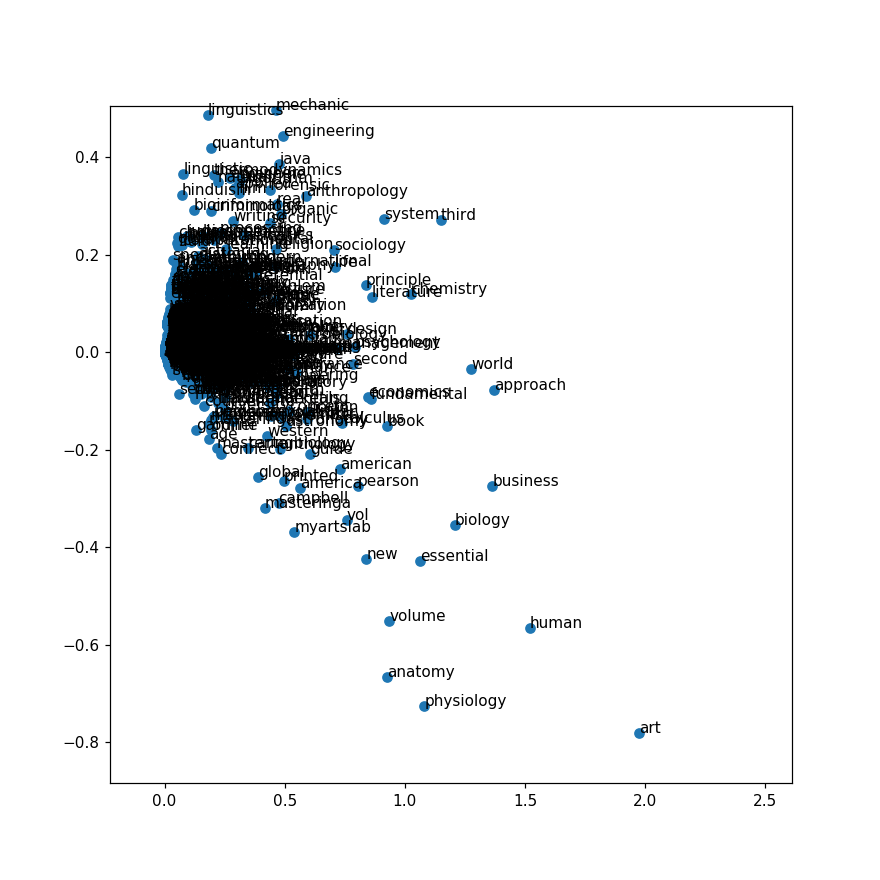

In [25]:
fig = plt.figure(figsize = (8,8))
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()

---------------------------------------------------------------------

# Article Spinner Project